In [77]:
import numpy as np
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

In [137]:
def rescale(array):
    mn = array.min()
    mx = array.max()
    array_ = array.copy()
    array_ -= mn
    array_ /= (mx-mn)
    return array_

def test_rescale():
    array = np.random.randn(10, 1000)
    assert((array.min(), array.max()) != (0., 1.))
    array = rescale(array)
    assert((array.min(), array.max()) == (0., 1.))
test_rescale()

In [138]:
from sklearn.datasets import make_multilabel_classification, make_blobs

In [153]:
make_blobs??

In [169]:
n_features = 300
n_concepts = 50
n_clusters = 4

In [171]:
seed = 3245
X, y = make_blobs(n_samples=n_concepts*n_clusters, n_features=n_features, 
                  centers=n_clusters, random_state=seed)

In [179]:
dist_x = 1. - pdist(X, metric='correlation')

In [180]:
y_sort = np.argsort(y)

In [181]:
dist_x = squareform(dist_x)[y_sort, :][:, y_sort]

In [182]:
# normalize rows and columns
dist_x = np.apply_along_axis(rescale, 0, dist_x)
dist_x /= dist_x.sum(axis=0)  # dist_x = dist_x / dist_x.sum(axis=0)

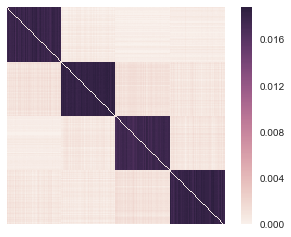

In [183]:
sns.heatmap(dist_x, xticklabels=False, yticklabels=False, square=True)

In [130]:
import networkx as nx

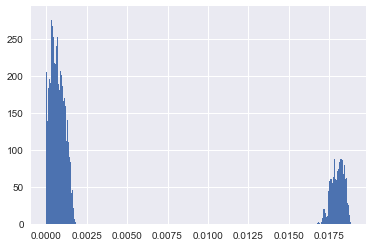

In [188]:
plt.hist(dist_x[np.triu_indices_from(dist_x)], bins=1000);

In [189]:
dist_x.mean()

0.0049999999999999992

In [190]:
dist_x_thresh = (dist_x > dist_x.mean()).astype(int)

In [191]:
dist_x_thresh

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [192]:
G = nx.from_numpy_matrix(dist_x_thresh)

/Users/contematto/anaconda2/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/contematto/anaconda2/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/contematto/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/contematto/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is dep

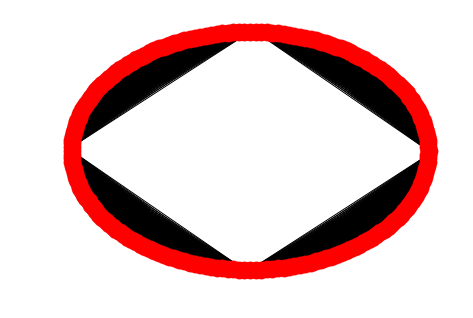

In [197]:
nx.draw_circular(G)